In [1]:
%load_ext autoreload
%autoreload 2

## initialize `G_baseline` network

In [2]:
N = 1000
INIT_EXPOSED = int(N * 0.5)

from seirsplus.networks import generate_demographic_contact_network, household_country_data

demographic_graphs, individual_ageGroups, households = generate_demographic_contact_network(
                                                            N=N, demographic_data=household_country_data('US'), 
                                                            distancing_scales=[0.7], isolation_groups=[])

G_baseline   = demographic_graphs['baseline']
G_quarantine = demographic_graphs['distancingScale0.7']

households_indices = [household['indices'] for household in households]

Generated overall age distribution:
0-9: 0.1100	(-0.0110 from target)
10-19: 0.1050	(-0.0260 from target)
20-29: 0.1500	(0.0130 from target)
30-39: 0.1240	(-0.0090 from target)
40-49: 0.1460	(0.0220 from target)
50-59: 0.1120	(-0.0190 from target)
60-69: 0.1230	(0.0080 from target)
70-79: 0.0850	(0.0150 from target)
80+: 0.0450	(0.0070 from target)

Generated household size distribution:
1: 0.2609	(-0.0228 from target)
2: 0.3402	(-0.0049 from target)
3: 0.1381	(-0.0126 from target)
4: 0.1586	(0.0309 from target)
5: 0.0614	(0.0036 from target)
6: 0.0256	(0.0030 from target)
7: 0.0153	(0.0029 from target)
Num households: 391
mean household size: 2.448393594

Generating graph for 0-9...
Generating graph for 10-19...
Generating graph for 20-59...


/opt/anaconda3/lib/python3.9/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)


Generating graph for 60+...


In [3]:
from seirsplus.viral_model import ViralExtSEIRNetworkModel

from seirsplus.sim_loops_pooled_test import SimulationRunner


## correlated pooling

In [11]:
test_model = ViralExtSEIRNetworkModel(
    G = G_baseline,
    beta = 0.1,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    initE = INIT_EXPOSED)


/opt/anaconda3/lib/python3.9/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)


In [12]:
sim_naive = SimulationRunner(
    model=test_model,
    pooling_strategy='naive',
    T = 100,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    save_results = False,
    output_path = '../results/')


Computing transition probabilities:   0%|          | 0/1000 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]


In [13]:
sim_naive.run_simulation()

[434, 339, 356, 336, 561] [1018, 1018, 1018, 1018, 1018]
[367, 155, 923, 939, 601] [0, 1018, 1018, 1018, 0]
[385, 652, 582, 516, 741] [1018, 1018, 0, 1018, 0]
[255, 560, 901, 728, 667] [0, 0, 1018, 0, 1018]
[402, 330, 435, 352, 620] [0, 1018, 0, 1018, 0]
[457, 433, 454, 849, 491] [0, 0, 1018, 1018, 0]
[928, 846, 522, 998, 898] [0, 1018, 0, 0, 0]
[452, 478, 910, 533, 370] [1018, 1018, 1018, 1018, 1018]
[850, 677, 314, 423, 371] [1018, 1018, 0, 1018, 1018]
[431, 460, 726, 617, 671] [1018, 1018, 1018, 0, 1018]
[694, 572, 676, 436, 990] [1018, 0, 1018, 1018, 1018]
[555, 965, 51, 692, 484] [1018, 1018, 1018, 0, 0]
[619, 927, 288, 964, 605] [1018, 0, 0, 1018, 0]
[922, 443, 512, 604, 911] [0, 0, 1018, 0, 1018]
[725, 685, 626, 519, 343] [0, 1018, 0, 1018, 1018]
[848, 506, 401, 727, 674] [1018, 0, 0, 0, 0]
[461, 733, 365, 885, 488] [1018, 1018, 1018, 1018, 1018]
[400, 665, 444, 695, 534] [1018, 0, 0, 1018, 0]
[627, 499, 581, 651, 666] [0, 1018, 1018, 1018, 1018]
[462, 323, 583, 976, 567] [1018,

TypeError: Cannot cast array data from dtype('O') to dtype('int64') according to the rule 'safe'

In [23]:
sim_naive.model.numQ_asym

array([0., 0., 0., ..., 0., 0., 0.])

In [24]:
sim_naive.model.numI_sym

array([0., 0., 0., ..., 0., 0., 0.])

In [32]:
sim_naive.model.tseries.shape

(6000,)

1866 59.0 27.0 18.0 11.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


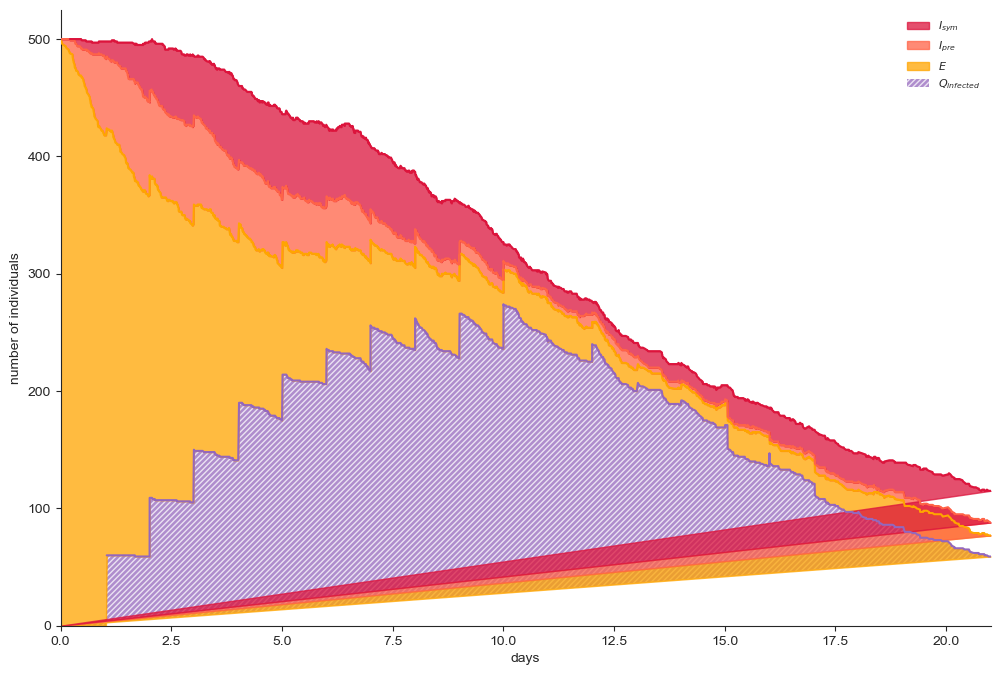

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='days', ylabel='number of individuals'>)

In [29]:
sim_naive.model.figure_infections(plot_percentages=False)

In [18]:
sim_naive.model.timer_state[410]

array([21.00567629])

In [10]:
sim_naive.model.tseries.max()

22.04613240574944

In [39]:
import numpy as np 
import math
math.log(1098274106572013316341760, 10)

24.04071074459049

In [7]:
sim_naive.model.__dict__

{'parameters': {'G': <networkx.classes.graph.Graph at 0x7fc138e38550>,
  'G_Q': None,
  'beta': 0.1,
  'sigma': 0.2,
  'lamda': 0.5,
  'gamma': 0.25,
  'eta': 0,
  'gamma_asym': None,
  'gamma_H': None,
  'mu_H': 0,
  'xi': 0,
  'mu_0': 0,
  'nu': 0,
  'a': 0,
  'h': 0,
  'f': 0,
  'p': 0,
  'beta_local': None,
  'beta_asym': None,
  'beta_asym_local': None,
  'beta_pairwise_mode': 'infected',
  'alpha': 1.0,
  'delta': None,
  'delta_pairwise_mode': None,
  'lamda_Q': None,
  'beta_Q': None,
  'beta_Q_local': None,
  'alpha_Q': None,
  'sigma_Q': None,
  'eta_Q': None,
  'gamma_Q_sym': None,
  'gamma_Q_asym': None,
  'delta_Q': None,
  'theta_S': 0,
  'theta_E': 0,
  'theta_pre': 0,
  'theta_sym': 0,
  'theta_asym': 0,
  'phi_S': 0,
  'phi_E': 0,
  'phi_pre': 0,
  'phi_sym': 0,
  'phi_asym': 0,
  'psi_S': 0,
  'psi_E': 1,
  'psi_pre': 1,
  'psi_sym': 1,
  'psi_asym': 1,
  'q': 0,
  'isolation_time': 14,
  'initE': 10,
  'initI_pre': 0,
  'initI_sym': 0,
  'initI_asym': 0,
  'initH': 0

In [16]:
list(sim_naive.model.numQ_R).index(1, 100)

430

In [21]:
sim_naive.model.__dict__.keys()

dict_keys(['parameters', 'G', 'A', 'numNodes', 'degree', 'G_Q', 'A_Q', 'numNodes_Q', 'degree_Q', 'beta', 'beta_asym', 'sigma', 'lamda', 'gamma', 'eta', 'gamma_asym', 'gamma_H', 'mu_H', 'alpha', 'xi', 'mu_0', 'nu', 'a', 'h', 'f', 'p', 'o', 'rand_a', 'rand_h', 'rand_f', 'prevalence_ext', 'beta_Q', 'sigma_Q', 'lamda_Q', 'gamma_Q_sym', 'gamma_Q_asym', 'eta_Q', 'alpha_Q', 'theta_S', 'theta_E', 'theta_pre', 'theta_sym', 'theta_asym', 'phi_S', 'phi_E', 'phi_pre', 'phi_sym', 'phi_asym', 'psi_S', 'psi_E', 'psi_pre', 'psi_sym', 'psi_asym', 'q', 'beta_pairwise_mode', 'beta_global', 'beta_Q_global', 'beta_asym_global', 'beta_local', 'beta_Q_local', 'beta_asym_local', 'A_beta_pairwise', 'A_Q_beta_Q_pairwise', 'A_beta_asym_pairwise', 'delta_pairwise_mode', 'delta', 'delta_Q', 'A_delta_pairwise', 'A_Q_delta_Q_pairwise', 'A_deltabeta', 'A_Q_deltabeta_Q', 'A_deltabeta_asym', 'tseries', 'numS', 'numE', 'numI_pre', 'numI_sym', 'numI_asym', 'numH', 'numR', 'numF', 'numQ_S', 'numQ_E', 'numQ_pre', 'numQ_sym

In [25]:
sum(sim_naive.model.__dict__['timer_state'] == max(sim_naive.model.__dict__['timer_state']))

array([975])

In [19]:
sim_naive.model.tseries[430], sim_naive.model.tseries[-1]

(51.390205972996384, 55.560205972995554)

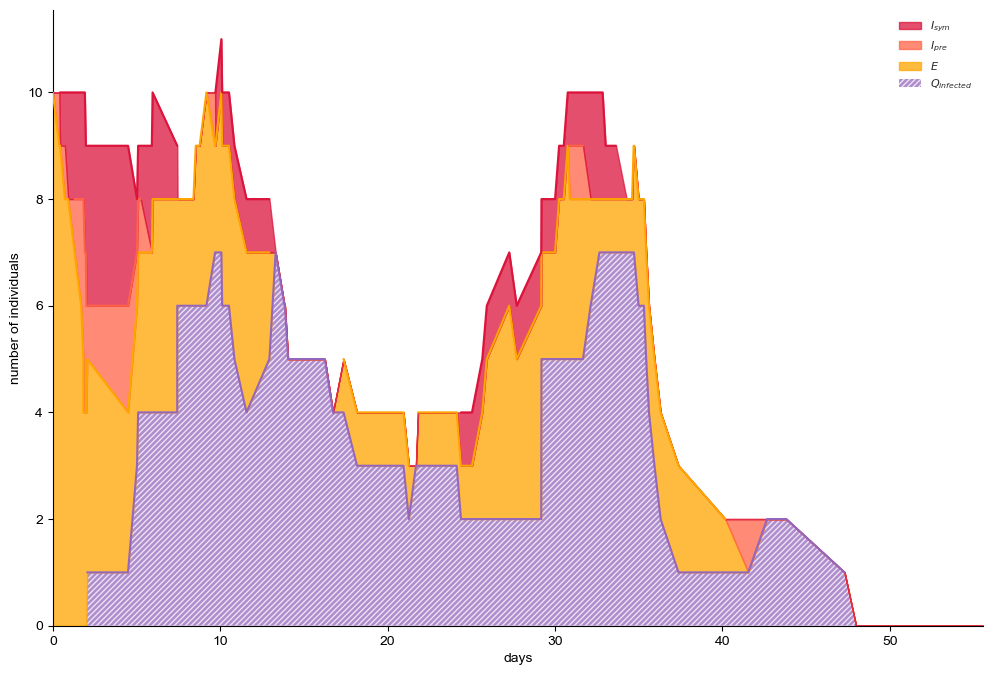

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='days', ylabel='number of individuals'>)

In [9]:
sim_naive.model.figure_infections(plot_percentages=False)

In [11]:
# cum_num_positives, cum_num_identified, sensitivity, test consumption
sim_correlated.get_cumulative_test_performance() 

{'cum_num_positives': 11,
 'cum_num_identified': 10,
 'cum_sensitivity': 0.9090909090909091,
 'cum_num_tests': 245}

## Naive pooling

In [12]:
# cum_num_positives, cum_num_identified, sensitivity, test consumption
sim_naive.get_cumulative_test_performance() 

{'cum_num_positives': 10,
 'cum_num_identified': 8,
 'cum_sensitivity': 0.8,
 'cum_num_tests': 240}

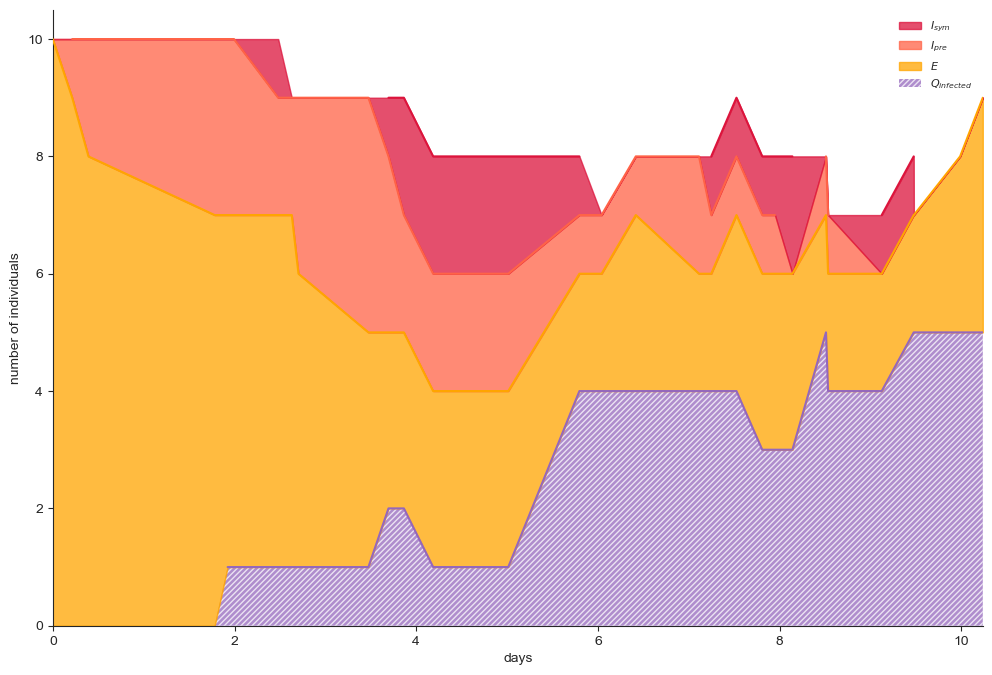

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='days', ylabel='number of individuals'>)

In [13]:
sim_naive.model.figure_infections(plot_percentages=False)